In [ ]:
%env CUBLAS_WORKSPACE_CONFIG=:16:8

In [ ]:
from autoencodix.utils.example_data import (
    EXAMPLE_MULTI_BULK,
    EXAMPLE_MULTI_SC,
    EXAMPLE_PROCESSED_DATA,
)

# EXAMPLE_DATA hold PyTorch Datasets (child with extra info) with metdata for train, test and valid splits
processed_data = EXAMPLE_PROCESSED_DATA
raw_bulk = EXAMPLE_MULTI_BULK
raw_sc = EXAMPLE_MULTI_SC

In [ ]:
EXAMPLE_PROCESSED_DATA.train.metadata

In [ ]:
import autoencodix as acx
from autoencodix.utils.default_config import DefaultConfig

In [ ]:
vanillix = acx.Vanillix(config=DefaultConfig(epochs=200, learning_rate=0.005,n_layers=1, latent_dim=2, checkpoint_interval=50), data=processed_data)
vanillix.run()
vanillix.show_result()

In [ ]:
categorical_clusters = ["Cluster_"+str(c) for c in EXAMPLE_PROCESSED_DATA.train.metadata.cluster]
categorical_clusters

In [ ]:
vanillix._visualizer.show_latent_space(result=vanillix.result,plot_type="2D-scatter", split="train", label_list=categorical_clusters, param="Cluster")
## Problem: during training sample order is shuffled due to batching. Order cannot be recovered with current result object.

In [ ]:
vanillix.result.model

## Ontix

In [1]:
import autoencodix as acx
from autoencodix.utils.default_config import DefaultConfig

from autoencodix.utils.example_data import (
    EXAMPLE_MULTI_BULK,
    EXAMPLE_MULTI_SC,
    EXAMPLE_PROCESSED_DATA,
)

# EXAMPLE_DATA hold PyTorch Datasets (child with extra info) with metdata for train, test and valid splits
processed_data = EXAMPLE_PROCESSED_DATA


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

ont_lvl1 = dict()
ont_lvl2 = dict()

ont_lvl1["pwy-1"] = ["sub-pwy-1", "sub-pwy-2"]
ont_lvl1["pwy-2"] = ["sub-pwy-2"]
ont_lvl1["pwy-3"] = ["sub-pwy-1", "sub-pwy-3"]
# first third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-1"] = processed_data.train.feature_ids[: int(len(processed_data.train.feature_ids) / 3)]
# second third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-2"] = processed_data.train.feature_ids[
	int(len(processed_data.train.feature_ids) / 3) : int(2 * len(processed_data.train.feature_ids) / 3)
]
# last third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-3"] = processed_data.train.feature_ids[
	int(2 * len(processed_data.train.feature_ids) / 3) : int(len(processed_data.train.feature_ids))
]

# ont_lvl2["sub-pwy-1"] = ["gene-1", "gene-2"]
# ont_lvl2["sub-pwy-2"] = ["gene-3", "gene-4"]
# ont_lvl2["sub-pwy-3"] = ["gene-2", "gene-6"]

ontology_tuple = ( ont_lvl1, ont_lvl2 )


In [3]:
# Write each dictionary in ontology_tuple to a separate text file
for i, ont_dict in enumerate(ontology_tuple):
	file_name = f"ontology_level_{i+1}.txt"
	with open(file_name, "w") as f:
		for key, values in ont_dict.items():
			for value in values:
				f.write(f"{value}\t{key}\n")
print("Ontology dictionaries written to ontology_level_1.txt and ontology_level_2.txt")

Ontology dictionaries written to ontology_level_1.txt and ontology_level_2.txt


In [4]:
ont_files = ["ontology_level_1.txt", "ontology_level_2.txt"]

In [5]:
ontix = acx.Ontix(ontologies=ont_files, sep="\t", config=DefaultConfig(epochs=5, learning_rate=0.005,n_layers=1), data=processed_data)
# ontix = acx.Ontix(ontologies=ontology_tuple, config=DefaultConfig(epochs=500, learning_rate=0.005,n_layers=1), user_data=processed_data)

In [6]:
ontix.run()

Ontix checks:
All possible feature names length: 30
Feature order length: 30
Feature names without filtering: 30
Mask layer 0 with shape torch.Size([3, 3]) and 5.0 connections
Mask layer 1 with shape torch.Size([30, 3]) and 30.0 connections
Latent Dim: 3
Training epoch 1/5
epoch: 0
anneal_pretraining is False
in pretraining phase, but annealing is not applied
annealing_epoch: None
effective_beta: 0.1, anneal_factor: 1.0
epoch: 0
anneal_pretraining is False
in pretraining phase, but annealing is not applied
annealing_epoch: None
effective_beta: 0.1, anneal_factor: 1.0
epoch: 0
anneal_pretraining is False
in pretraining phase, but annealing is not applied
annealing_epoch: None
effective_beta: 0.1, anneal_factor: 1.0
epoch: 0
anneal_pretraining is False
in pretraining phase, but annealing is not applied
annealing_epoch: None
effective_beta: 0.1, anneal_factor: 1.0
epoch: 0
anneal_pretraining is False
in pretraining phase, but annealing is not applied
annealing_epoch: None
effective_beta: 

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: OntixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._numeric_dataset.NumericDataset object at 0x33233fd30>, valid=<autoencodix.data._numeric_dataset.NumericDataset object at 0x33233f430>, test=<autoencodix.data._numeric_dataset.NumericDataset object at 0x332004970>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 201 × 3
    uns: 'var_names'
final_reconstruction: <autoencod

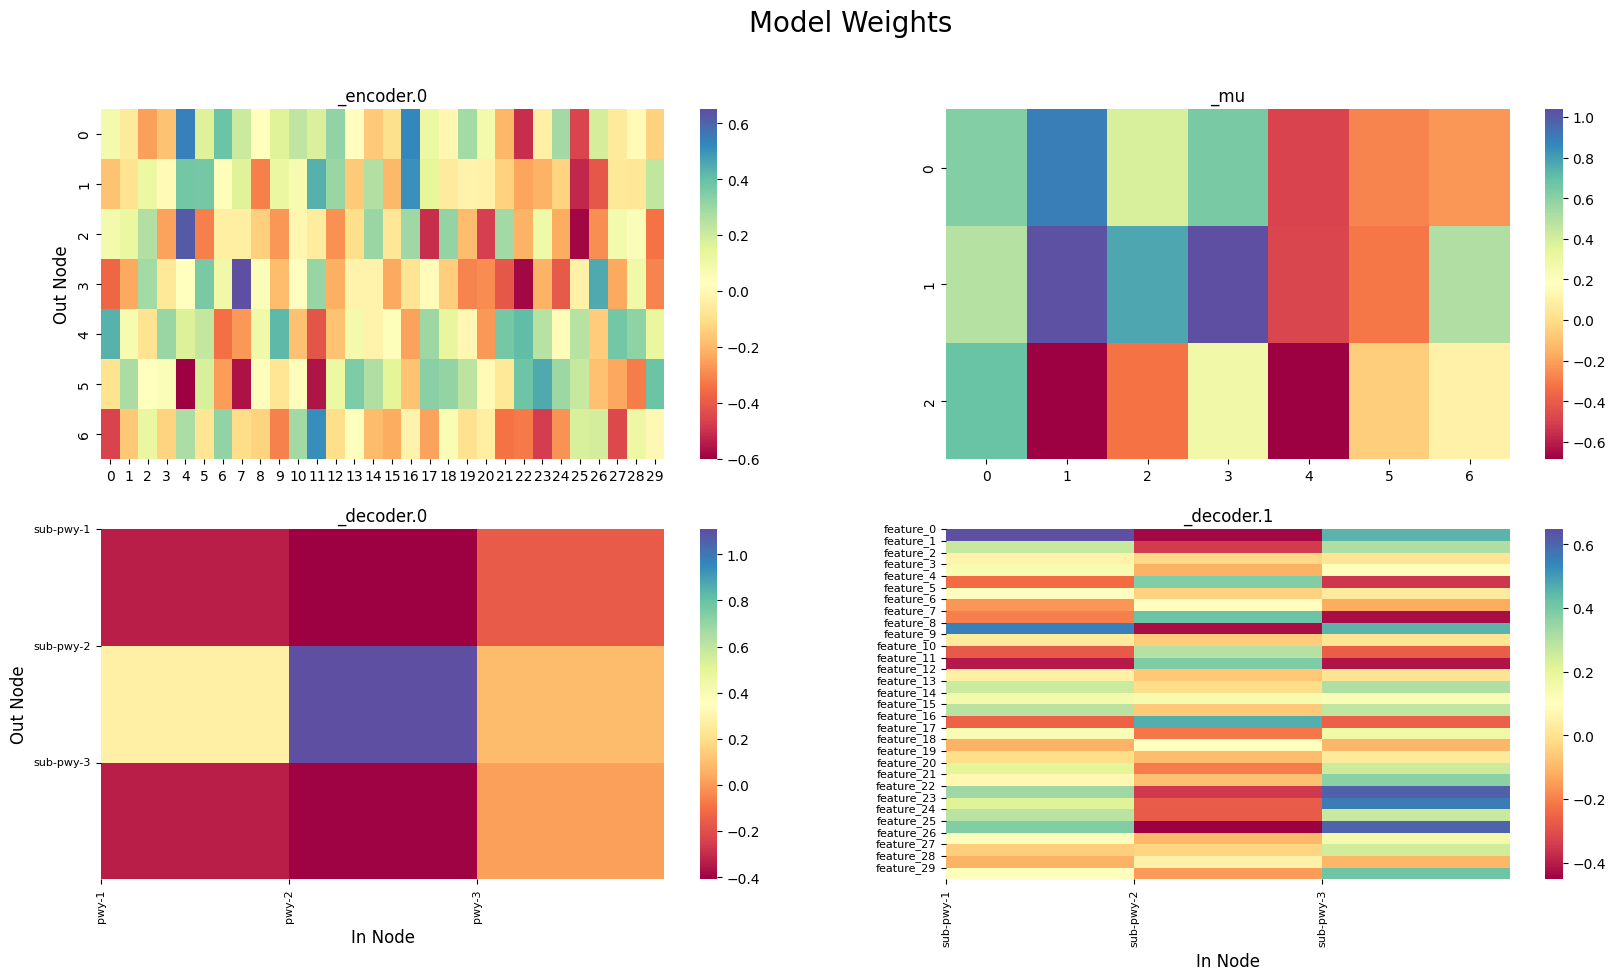

In [7]:
ontix._visualizer.show_weights()

Creating plots ...


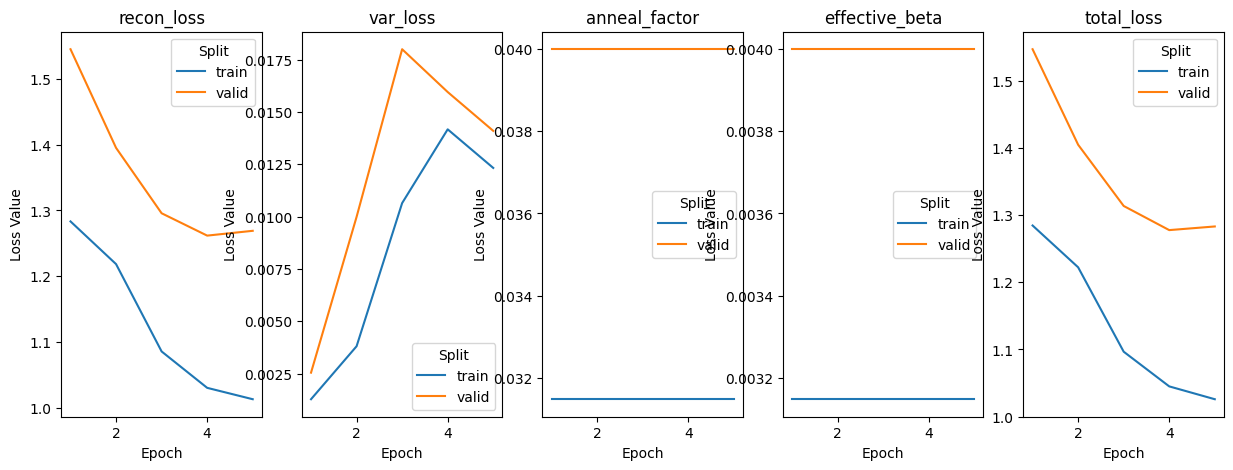

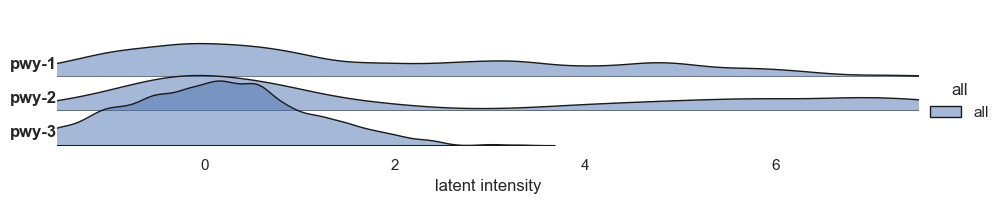

/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


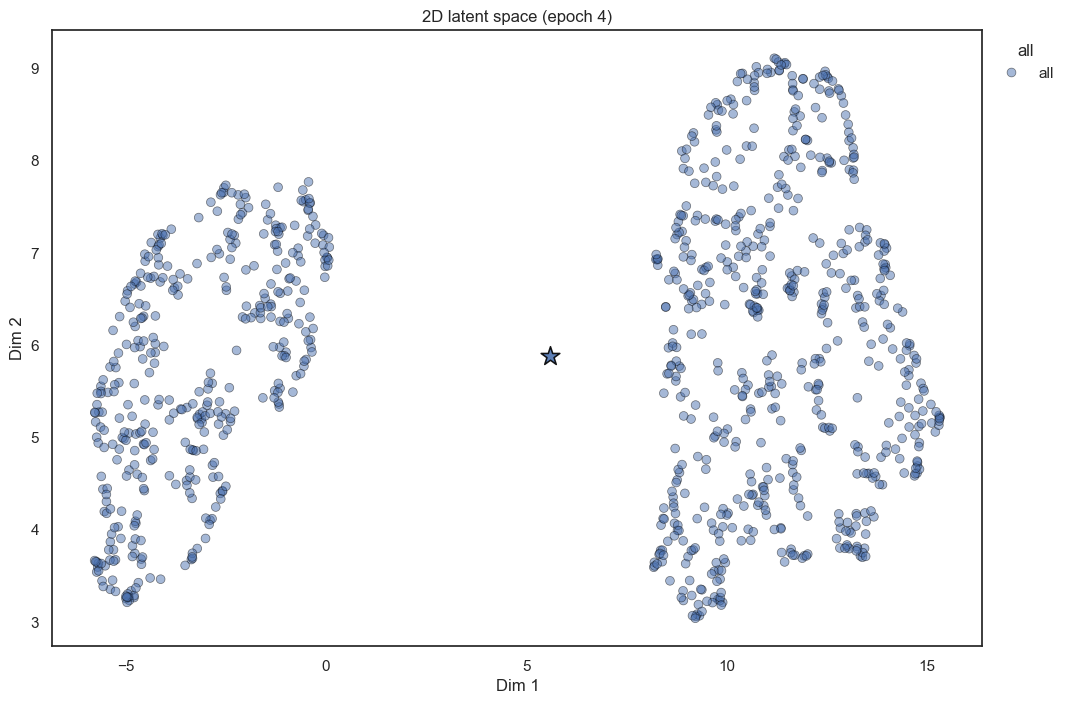

In [8]:
ontix.show_result()

/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


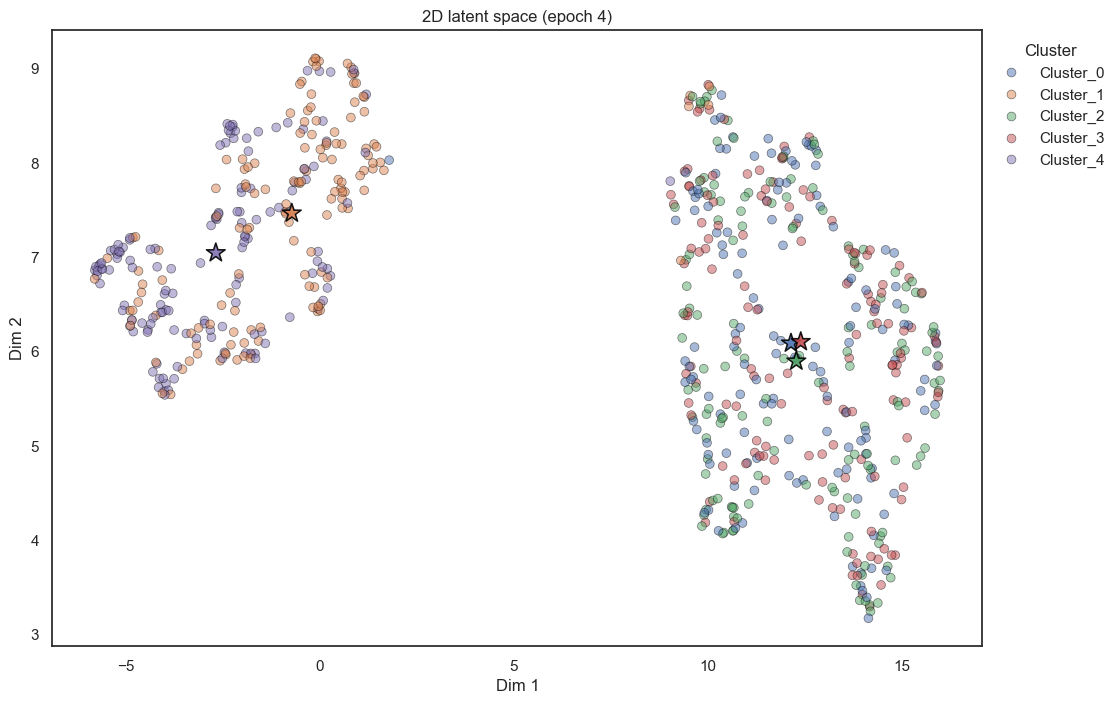

In [9]:
categorical_clusters = ["Cluster_"+str(c) for c in EXAMPLE_PROCESSED_DATA.train.metadata.cluster]
categorical_clusters
ontix._visualizer.show_latent_space(result=ontix.result,plot_type="2D-scatter", split="train", label_list=categorical_clusters, param="Cluster")

In [10]:
ontix.ontologies

({'pwy-1': ['sub-pwy-1', 'sub-pwy-2'],
  'pwy-2': ['sub-pwy-2'],
  'pwy-3': ['sub-pwy-1', 'sub-pwy-3']},
 {'sub-pwy-1': ['feature_0',
   'feature_1',
   'feature_2',
   'feature_3',
   'feature_4',
   'feature_5',
   'feature_6',
   'feature_7',
   'feature_8',
   'feature_9'],
  'sub-pwy-2': ['feature_10',
   'feature_11',
   'feature_12',
   'feature_13',
   'feature_14',
   'feature_15',
   'feature_16',
   'feature_17',
   'feature_18',
   'feature_19'],
  'sub-pwy-3': ['feature_20',
   'feature_21',
   'feature_22',
   'feature_23',
   'feature_24',
   'feature_25',
   'feature_26',
   'feature_27',
   'feature_28',
   'feature_29']})

In [11]:
enumerate(ontix.result.model.ontologies)

In [12]:
ontix.result.model.ontologies[1].keys()

dict_keys(['sub-pwy-1', 'sub-pwy-2', 'sub-pwy-3'])

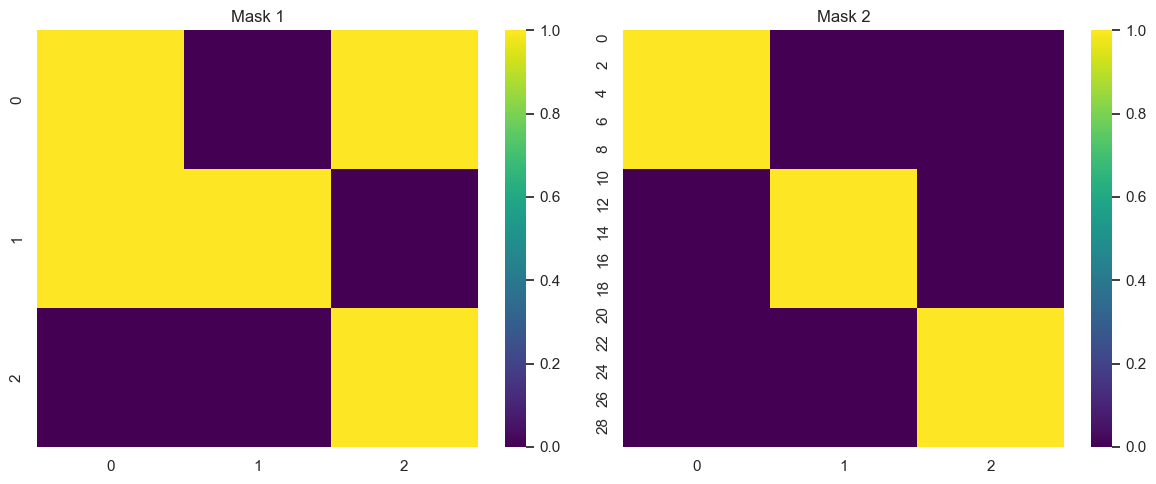

In [13]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

masks = ontix.result.model.masks

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, mask in enumerate(masks):
	sns.heatmap(np.array(mask), ax=axes[i], cmap="viridis")
	axes[i].set_title(f"Mask {i+1}")
plt.tight_layout()
plt.show()

In [14]:
ontix.preprocessed_data.train.feature_ids

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29']

In [15]:
# Print all available attributes of ontix
print("Attributes of ontix:")
for attr in dir(ontix):
	if not attr.startswith("__"):
		print(attr)


Attributes of ontix:
_abc_impl
_data_splitter
_dataset_type
_datasets
_evaluator
_fill_data_info
_generate_predictions
_get_existing_datasets
_handle_dataset_container
_handle_dataset_container_reconstruction
_handle_direct_user_data
_handle_multi_single_cell_reconstruction
_handle_unsupported_reconstruction
_handle_user_data
_handle_user_data_reconstruction
_loss_type
_model_type
_ontologies
_postprocess_reconstruction
_prepare_prediction_data
_preprocessor
_preprocessor_type
_process_latent_results
_read_ont_file
_trainer
_trainer_type
_validate_config
_validate_config_data
_validate_container
_validate_prediction_data
_validate_prediction_requirements
_validate_raw_user_data
_validate_user_data
_validate_user_input
_visualizer
config
decode
evaluate
fit
load
ontologies
predict
preprocess
preprocessed_data
raw_user_data
result
run
sample_latent_space
save
show_result
visualize


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


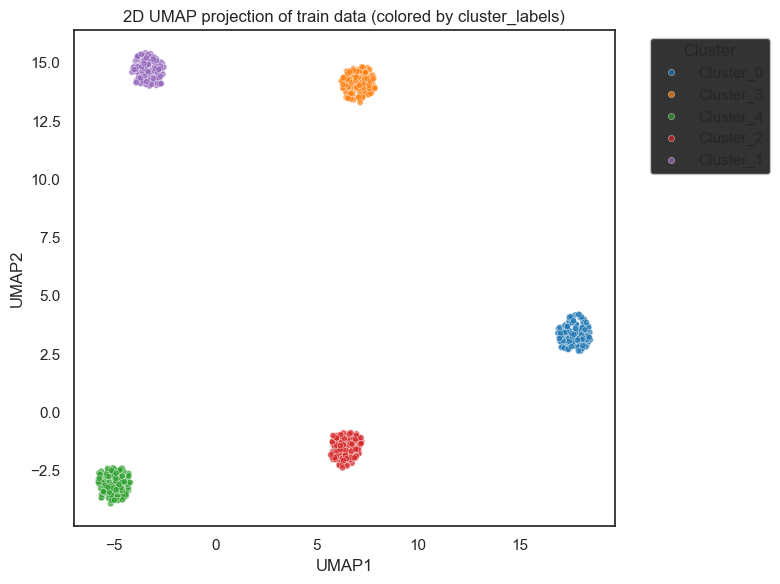

In [16]:
import seaborn as sns
import pandas as pd
import umap
import matplotlib.pyplot as plt


# Fit UMAP to reduce to 2D
umap_2d_seaborn = umap.UMAP(n_components=2, random_state=42)
embedding_seaborn = umap_2d_seaborn.fit_transform(EXAMPLE_PROCESSED_DATA.train.data)

# Create a DataFrame for plotting
umap_df = pd.DataFrame({
	"UMAP1": embedding_seaborn[:, 0],
	"UMAP2": embedding_seaborn[:, 1],
	"Cluster": categorical_clusters
})

plt.figure(figsize=(8, 6))
sns.scatterplot(
	data=umap_df,
	x="UMAP1",
	y="UMAP2",
	hue="Cluster",
	palette="tab10",
	s=20,
	alpha=0.7
)
plt.title("2D UMAP projection of train data (colored by cluster_labels)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()